In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])


(60000, 28, 28)
(10000, 28, 28)
60000


In [4]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

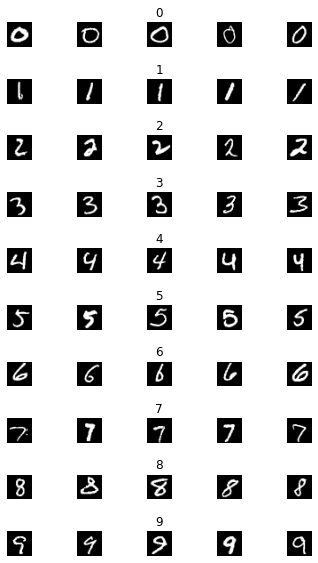

In [5]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()


for i in range(10):
    x_selected = X_train[y_train == i]
    num_of_samples.append(len(x_selected))
    for j in range(5):
        axs[i][j].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[i][j].axis('off')
        if j == 2:
            axs[i][j].set_title(str(i))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

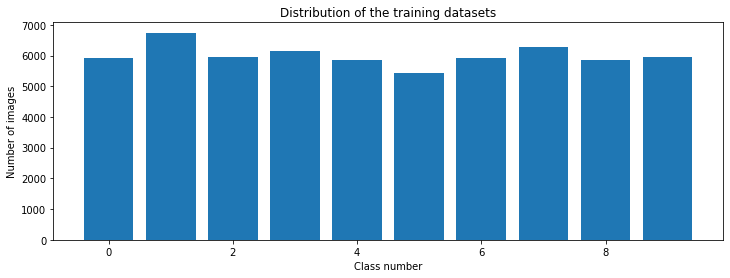

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training datasets")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [7]:
# label encoding : one hot encoding technique
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data normalization
X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.5638 - accuracy: 0.8269 - val_loss: 0.2674 - val_accuracy: 0.9240
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.9047 - val_loss: 0.2428 - val_accuracy: 0.9288
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2971 - accuracy: 0.9138 - val_loss: 0.2407 - val_accuracy: 0.9280
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2801 - accuracy: 0.9182 - val_loss: 0.2209 - val_accuracy: 0.9378
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9212 - val_loss: 0.2420 - val_accuracy: 0.9293
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.9217 - val_loss: 0.2240 - val_accuracy: 0.9337
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9251 - val_loss: 0.2218 - val_accuracy: 0.9370
Epoch 

Text(0.5, 0, 'epoch')

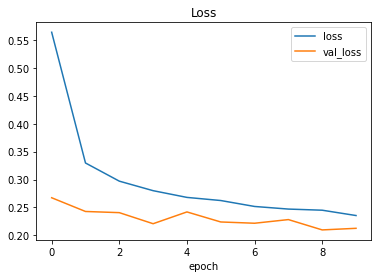

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

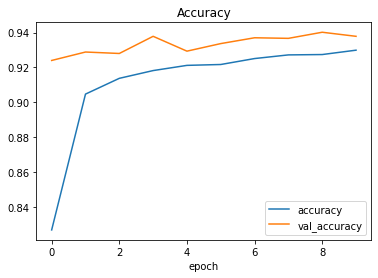

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.25116536021232605
Test accuracy: 0.9269000291824341


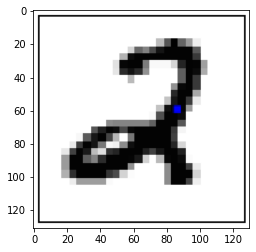

In [14]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

predicted digit: 2


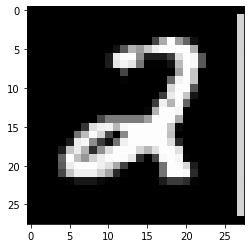

In [15]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict(img)
prediction = np.argmax(prediction)
print("predicted digit:", str(prediction))